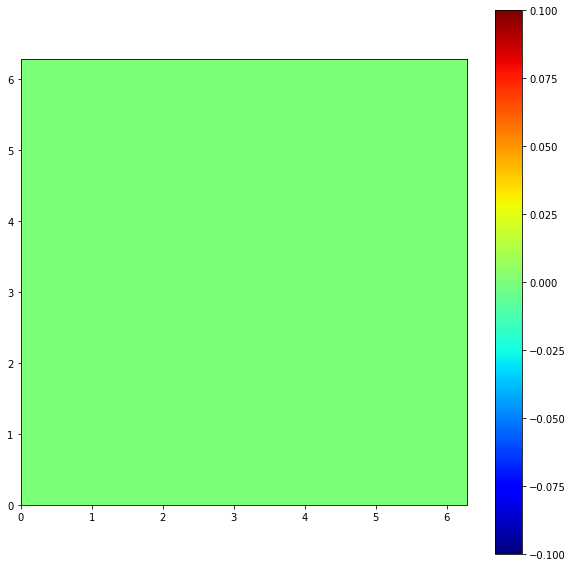

In [5]:
'''
We investigate 2D turbulence governed by the incompressible Navier-Stokes equations

(1) ∇ · u = 0
(2) ∂tu + u · ∇u = −∇p + 1/Re ∆u + f

where u = (u, v) is the velocity field, p is the pressure, Re is the Reynolds number, and f is a harmonic volume force defined as f = (sin(k_f*y), 0) in cartesian coordinates.

The Navier-Stokes equations are solved on a domain Ω ≡ [0, 2π] × [0, 2π] with periodic boundary conditions.
The solution of this problem is also known as the 2D Kolmogorov flow.

The flow has a laminar solution u = Re*k_f^(-2)*sin(k_f*y), v = 0, which is unstable for sufficiently large Reynolds numbers and wave numbers k_f.

Here, we take kf = 4 and Re = 30 to guarantee the development of a turbulent solution.

The set of Equations above are solved on a uniform N × N grid, with N = 24, using a pseudo-spectral
code with explicit Euler in time with a timestep, ∆t = 0.01, to ensure numerical stability.

'''

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')
plt.style.use('seaborn-pastel')

N = 24
L = 2*np.pi
h = L/N
k = 2*np.pi/L
x = np.arange(0, L, h)
y = np.arange(0, L, h)
[X, Y] = np.meshgrid(x, y)
kx = np.arange(-N/2, N/2)*k
ky = np.arange(-N/2, N/2)*k
[KX, KY] = np.meshgrid(kx, ky)
KX = np.fft.fftshift(KX)
KY = np.fft.fftshift(KY)
K2 = KX**2 + KY**2
K2[0, 0] = 1
K4 = K2**2
Kf = 4
Re = 30

u = np.zeros((N, N))
v = np.zeros((N, N))
u_hat = np.zeros((N, N), dtype=complex)
v_hat = np.zeros((N, N), dtype=complex)
p = np.zeros((N, N))
p_hat = np.zeros((N, N), dtype=complex)
f = np.zeros((N, N))
f_hat = np.zeros((N, N), dtype=complex)
f_hat[int(N/2), int(N/2)] = np.sin(Kf*Y[int(N/2), int(N/2)])*np.exp(-Kf**2*Re/4)
t = 0
dt = 0.01
tmax = 100

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(0, 2*np.pi)
im = ax.imshow(u, cmap='jet', vmin=-0.1, vmax=0.1, animated=True)
plt.colorbar(im)